## Explore Piece Classification Results

A 13xN grid of classified training data.

N is the minimum number of examples predicted by the model on the current batch. 
(Discover if train_generator is very uneven.)


### Training data results

In [35]:
from square_classifier import build_square_classifier
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

num_classes = 13
batch_size = 300

# input image dimensions
input_shape = (64, 64, 1)

train_datagen = ImageDataGenerator(
        rescale=1./255
        )

# Class weighting
#https://stackoverflow.com/questions/44666910/keras-image-preprocessing-unbalanced-data
#https://stackoverflow.com/questions/42586475/is-it-possible-to-automatically-infer-the-class-weight-from-flow-from-directory
#train_datagen.fit()

train_generator = train_datagen.flow_from_directory(
        '../../data/squares_gen2',
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical')

# Build the model
model = build_square_classifier()
model.load_weights("../../weights/best_weights_square.hdf5")

# Get a batch of training data
im_batch, _ = next(train_generator)

Found 6266 images belonging to 13 classes.


In [39]:
im_batch, _ = next(train_generator)

In [40]:
# Predict a batch & compute min 
from collections import Counter

label_names  = ['B', 'K', 'N', 'P', 'Q', 'R', 'b', 'k', 'n', 'p', 'q', 'r', 'f']

class_probs = model.predict(im_batch)
predictions = np.argmax(class_probs, axis=1)
pred_labels = [label_names[p] for p in predictions]

# Get the minimum number of predictions for each class
counter = Counter(pred_labels)                          
num_sq = int(min(counter.values()))

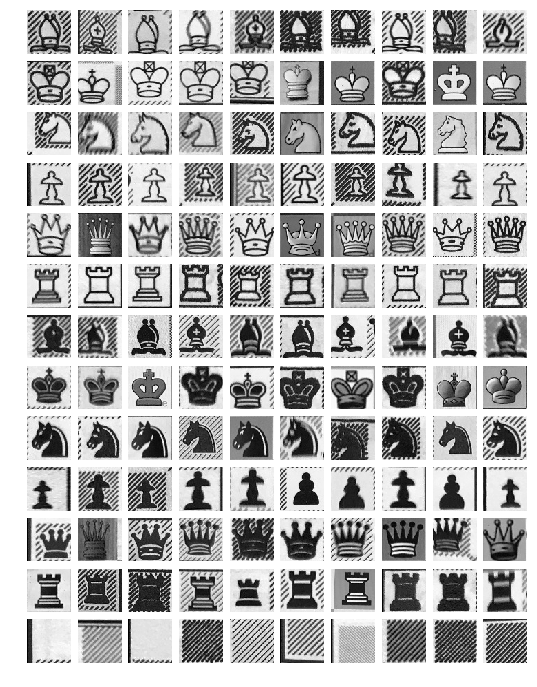

In [41]:
# Plot a grid of pieces

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

rows = num_classes
cols = num_sq

fig = plt.figure(1, figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 share_all=True,
                 label_mode=None
                 )

for i, class_name in enumerate(label_names):
    k = 0
    for j in range(cols):
        # get a new image from im_batch with pred_label class_name
        while pred_labels[k] != class_name:
            k += 1
        ax = grid[cols*i+j]
        ax.imshow(im_batch[k].reshape(64, 64), cmap="gray")
        ax.axis("off")
        k += 1

#plt.savefig("../../img/training_classification11.png", bbox_inches="tight")
plt.show()

### Test data results

- get batch of raw images (N=5)
- extract boards
- extract squares (N * 64) -> batch
- same as above: count min_sq and plot a grid